# Section Six - Diagnosing issues with models
You think you have a good model, but you remain unconvinced about using it in production. We talk about key aspects of retraining, fine tuning and creating a sustained ML infrastructure by evaluation in this chapter.

## Understanding our accuracy in predicting numbers

In [6]:
from sklearn.datasets import load_boston
boston_data = load_boston()

In [7]:
X = boston_data.data
y = boston_data.target

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
# method 1
model.score(X_train, y_train)

0.7392517054590779

In [15]:
# solution - k-fold CV
from sklearn.model_selection import cross_val_score

# split data, fit model and computing the score 5 times 
# different splits each time
scores = cross_val_score(model, X_train, y_train, cv=5)  
scores

array([0.66956472, 0.69971029, 0.76897957, 0.7436361 , 0.66016496])

In [16]:
scores.mean(), scores.std() * 2

(0.7084111276114692, 0.0840084542944814)

In [19]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, model.predict(X_test))

0.7264142415850836

In [18]:
from sklearn.metrics import mean_absolute_error

# average(|y_true - y_pred|)
mean_absolute_error(y_test, model.predict(X_test))

3.151287836588393

In [20]:
from sklearn.metrics import mean_squared_error

# average(y_true - y_pred) ^ 2
mean_squared_error(y_test, model.predict(X_test))

20.747143360308918

In [23]:
from sklearn.metrics import median_absolute_error

# median(|y_true - y_pred|)
median_absolute_error(y_test, model.predict(X_test))

2.317009307610956

In [25]:
from sklearn.metrics import r2_score

# measure of how well future samples are likely to be predicted by the model
r2_score(y_test, model.predict(X_test))

0.7258515818230052

## Assessing our correctness in predicting labels

In [26]:
# train test split
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import linear_model
dataset = datasets.load_iris()

In [27]:
hold_out_percent = 0.4

# let's not overfit the entire dataset, split the data
X_train, X_test, y_train, y_test = train_test_split(
    dataset.data, dataset.target, test_size=hold_out_percent, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((90, 4), (60, 4), (90,), (60,))

In [28]:
model = linear_model.LogisticRegression(
    penalty='l2',
    dual=False,  # Dual or primal formulation.
    tol=0.0001,  # Tolerance for stopping criteria.
    C=1.0,  # Inverse of regularization strength; must be a positive float.
    fit_intercept=True
).fit(X_train, y_train)

In [29]:
# method 1
model.score(X_train, y_train)

0.9555555555555556

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model.predict(X_test))

0.9666666666666667

In [31]:
from sklearn.metrics import cohen_kappa_score
# compare labelings by different human annotators
# a number between -1 and 1. Scores above .8 = good agreement
# zero or lower means no agreement (that is, random).
cohen_kappa_score(y_test, model.predict(X_test))

0.949748743718593

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, model.predict(X_test))

0.9666666666666667

In [32]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, model.predict(X_test))

array([[23,  0,  0],
       [ 0, 17,  2],
       [ 0,  0, 18]], dtype=int64)

In [41]:
import numpy as np
import itertools
import matplotlib.pyplot as plt


# attribution - from scikit-learn documentation
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')


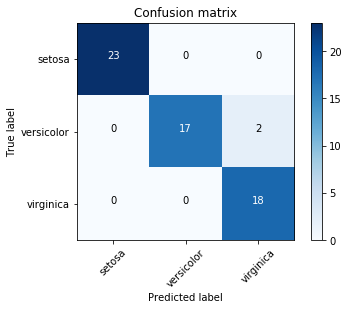

In [42]:
plot_confusion_matrix(confusion_matrix(y_test, model.predict(X_test)), classes=dataset.target_names)
plt.show()

## Dealing with overfitting using regularization

In [6]:
from sklearn.datasets import load_boston
boston_data = load_boston()

In [7]:
X = boston_data.data
y = boston_data.target

In [8]:
from sklearn.linear_model import LinearRegression

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [63]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(StandardScaler(), PolynomialFeatures(degree=3), LinearRegression())
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [64]:
pipe.score(X_train, y_train)

0.8757811828728769

In [65]:
pipe.score(X_test, y_test)

0.45035037563566804

In [66]:
pipe.steps[2][1].coef_

array([ 5.89322907e+12,  2.59038593e-01, -9.78685777e-02, -5.73951828e-01,
        5.73991971e-01,  3.23338655e-01, -1.49958058e-01, -3.74198611e-01,
       -3.98334685e-01,  2.98667306e-02,  7.23902030e-01, -9.98817145e-01,
        1.11344089e+00, -1.24183755e+00,  9.03421662e-01, -4.44264944e-01,
        4.57994108e-01,  5.42687158e-01, -1.25726296e-01, -2.55245499e-01,
        6.91852406e-01, -1.65109024e+00, -2.60443066e-01, -1.34320704e-01,
        6.15072605e-01,  6.80363056e-03,  4.95945288e-01, -2.63552196e-01,
        2.23830927e-01, -6.09187329e-01,  5.24712911e-01,  1.95428030e+00,
       -4.26314772e+00,  3.72646468e+00, -1.14014915e+00])

In [67]:
pipe.steps[2][1].coef_.max(), pipe.steps[2][1].coef_.min(), pipe.steps[2][1].coef_.std()

(5893229072146.399, -4.263147717083156, 981803863571.1265)

## Ridge

In [68]:
from sklearn.linear_model import Ridge

# tactic 1: minimize weights, smaller the better, higher penalty on large weights
# = ridge regression

pipe = make_pipeline(StandardScaler(), PolynomialFeatures(degree=3), Ridge())
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [69]:
pipe.steps[2][1].coef_

array([ 0.        ,  0.02778911, -0.10487262,  0.30432653,  0.52800957,
       -0.01726216,  0.09256294,  0.01374311, -0.04667456, -0.00606043,
       -0.10567922, -0.04895509,  0.13447503,  0.04813505,  0.08779877,
       -0.07040113, -0.01506703,  0.02347408,  0.00139215, -0.04176743,
        0.04429344, -0.00289214,  0.04613557, -0.0274618 ,  0.04725991,
       -0.00152338,  0.04568957, -0.02719411, -0.00068229,  0.01356679,
       -0.05602747,  0.1170444 , -0.02498727, -0.01445496, -0.06999018])

In [70]:
pipe.steps[2][1].coef_.max(), pipe.steps[2][1].coef_.min(), pipe.steps[2][1].coef_.std()

(0.5280095650858079, -0.10567921639764272, 0.11382347693107493)

In [48]:
pipe.score(X_train, y_train)

0.9510288494074335

In [49]:
pipe.score(X_test, y_test)

0.9208309455931071

## Lasso

In [71]:
from sklearn.linear_model import Lasso

# tactic 2: minimize number of non-zero weights
# = Lasso

pipe = make_pipeline(StandardScaler(), PolynomialFeatures(degree=3), Lasso())
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [72]:
pipe.score(X_train, y_train)

0.32526445417158134

In [73]:
pipe.score(X_test, y_test)

0.32611052550964237

In [74]:
pipe.steps[2][1].coef_

array([ 0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.0299572 ,  0.        ,  0.        ,  0.06265774])

In [75]:
pipe.steps[2][1].coef_.max(), pipe.steps[2][1].coef_.min(), pipe.steps[2][1].coef_.std()

(0.0626577442538207, 0.0, 0.011437225343432025)

## Lasso-Ridge = ElasticNet

In [76]:
from sklearn.linear_model import ElasticNet

# tactic 3: mix lasso and ridge!
# = elasticnet

pipe = make_pipeline(StandardScaler(), PolynomialFeatures(degree=3), ElasticNet())
pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomialfeatures', PolynomialFeatures(degree=3, include_bias=True, interaction_only=False)), ('elasticnet', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False))])

In [77]:
pipe.score(X_train, y_train)

0.6814645605129058

In [78]:
pipe.score(X_test, y_test)

0.7150610781393483

In [79]:
pipe.steps[2][1].coef_

array([ 0.        ,  0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.        ,  0.10101623,  0.02890615,  0.02768347,  0.08834185])

In [80]:
pipe.steps[2][1].coef_.max(), pipe.steps[2][1].coef_.min(), pipe.steps[2][1].coef_.std()

(0.10101622685584027, 0.0, 0.022603543607984538)